In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [62]:

train = pd.read_csv("/content/drive/MyDrive/datii/train_airplanes.csv")
test=pd.read_csv("/content/drive/MyDrive/datii/test_airplanes.csv")
train

,Unnamed: 0,index,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,target
0,0,0,-0.492317,1.466367,-1.526395,-1.096350,1.535413,0.431657,-0.995667,-0.923376,...,0.297878,-0.284032,1.687770,-0.921498,1.125147,-1.374343,-1.134642,0.455824,-0.840537,1
1,1,1,-0.008567,1.139580,0.790067,-0.228271,1.113299,-1.636661,-2.196571,0.242685,...,-1.990695,1.846958,-0.568885,0.989542,1.480607,1.359533,-0.868660,-1.588205,-0.644534,0
2,2,2,0.262494,-1.708783,0.839842,-0.687014,-1.073257,-0.969666,-0.193912,-0.176669,...,-2.166032,2.418959,1.634712,-0.602909,0.883138,-0.286632,-0.075973,0.234760,0.082982,1
3,3,3,-1.804729,-0.241023,-0.661755,0.818932,-0.603637,0.002671,1.321453,-0.192295,...,0.424665,-0.605261,-1.361730,0.578875,0.714414,0.152165,2.286288,-0.285059,0.638533,1
4,4,4,-0.017279,0.813156,-1.020284,0.874544,-0.572061,0.497832,0.012510,-0.743429,...,2.769164,-3.464306,-0.087558,-0.654737,2.019519,-2.293658,-1.574068,1.344927,-2.390142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,795,0.480216,-0.815049,-0.727074,0.511742,-0.507355,1.029718,0.429738,0.146823,...,0.961482,-0.795995,0.063269,-0.618536,0.586455,-0.047379,0.299899,0.725734,-0.649755,0
796,796,796,0.857515,2.327731,-1.185683,-0.586519,-0.558847,0.712851,0.261446,-1.064356,...,0.749485,-0.710907,-0.537000,0.894755,-0.981916,-0.062048,0.609614,0.206624,-1.724080,1
797,797,797,0.023109,0.342980,-1.008733,-0.841854,-0.168426,0.486804,-1.697874,-0.780809,...,-1.049205,1.553320,-1.185487,-0.677708,0.329874,0.889464,-0.528109,0.443686,0.380687,1
798,798,798,0.081947,-0.562397,-0.127637,-0.105462,0.535161,-0.426872,2.288164,-0.962513,...,-1.758119,2.087053,1.204362,-1.382999,-0.329993,0.443899,2.517259,0.799944,-0.439192,1


In [63]:
print(train.shape)
# размерность у test
# shape - возвращает размерность датафрейма (кол-во строк, кол-во столбцов)
print(test.shape)

(800, 33)
(200, 32)


In [64]:
print(train.info())
print(test.dtypes)
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  800 non-null    int64  
 1   index       800 non-null    int64  
 2   0           800 non-null    float64
 3   1           800 non-null    float64
 4   2           800 non-null    float64
 5   3           800 non-null    float64
 6   4           800 non-null    float64
 7   5           800 non-null    float64
 8   6           800 non-null    float64
 9   7           800 non-null    float64
 10  8           800 non-null    float64
 11  9           800 non-null    float64
 12  10          800 non-null    float64
 13  11          800 non-null    float64
 14  12          800 non-null    float64
 15  13          800 non-null    float64
 16  14          800 non-null    float64
 17  15          800 non-null    float64
 18  16          800 non-null    float64
 19  17          800 non-null    f

In [65]:

print(train.isna().sum())
     


Unnamed: 0    0
index         0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
target        0
dtype: int64


In [66]:
train = train.drop(['Unnamed: 0'], axis=1)
train = train.drop(['index'], axis=1)
print(train.isna().sum())
train

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
target    0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,-0.492317,1.466367,-1.526395,-1.096350,1.535413,0.431657,-0.995667,-0.923376,-0.046921,-1.552539,...,0.297878,-0.284032,1.687770,-0.921498,1.125147,-1.374343,-1.134642,0.455824,-0.840537,1
1,-0.008567,1.139580,0.790067,-0.228271,1.113299,-1.636661,-2.196571,0.242685,0.598070,-0.757704,...,-1.990695,1.846958,-0.568885,0.989542,1.480607,1.359533,-0.868660,-1.588205,-0.644534,0
2,0.262494,-1.708783,0.839842,-0.687014,-1.073257,-0.969666,-0.193912,-0.176669,0.659922,0.596649,...,-2.166032,2.418959,1.634712,-0.602909,0.883138,-0.286632,-0.075973,0.234760,0.082982,1
3,-1.804729,-0.241023,-0.661755,0.818932,-0.603637,0.002671,1.321453,-0.192295,-0.210527,0.534755,...,0.424665,-0.605261,-1.361730,0.578875,0.714414,0.152165,2.286288,-0.285059,0.638533,1
4,-0.017279,0.813156,-1.020284,0.874544,-0.572061,0.497832,0.012510,-0.743429,-0.439319,0.255225,...,2.769164,-3.464306,-0.087558,-0.654737,2.019519,-2.293658,-1.574068,1.344927,-2.390142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.480216,-0.815049,-0.727074,0.511742,-0.507355,1.029718,0.429738,0.146823,0.291985,-1.609678,...,0.961482,-0.795995,0.063269,-0.618536,0.586455,-0.047379,0.299899,0.725734,-0.649755,0
796,0.857515,2.327731,-1.185683,-0.586519,-0.558847,0.712851,0.261446,-1.064356,0.777612,0.679031,...,0.749485,-0.710907,-0.537000,0.894755,-0.981916,-0.062048,0.609614,0.206624,-1.724080,1
797,0.023109,0.342980,-1.008733,-0.841854,-0.168426,0.486804,-1.697874,-0.780809,1.249663,-2.226879,...,-1.049205,1.553320,-1.185487,-0.677708,0.329874,0.889464,-0.528109,0.443686,0.380687,1
798,0.081947,-0.562397,-0.127637,-0.105462,0.535161,-0.426872,2.288164,-0.962513,-0.925017,-0.505982,...,-1.758119,2.087053,1.204362,-1.382999,-0.329993,0.443899,2.517259,0.799944,-0.439192,1


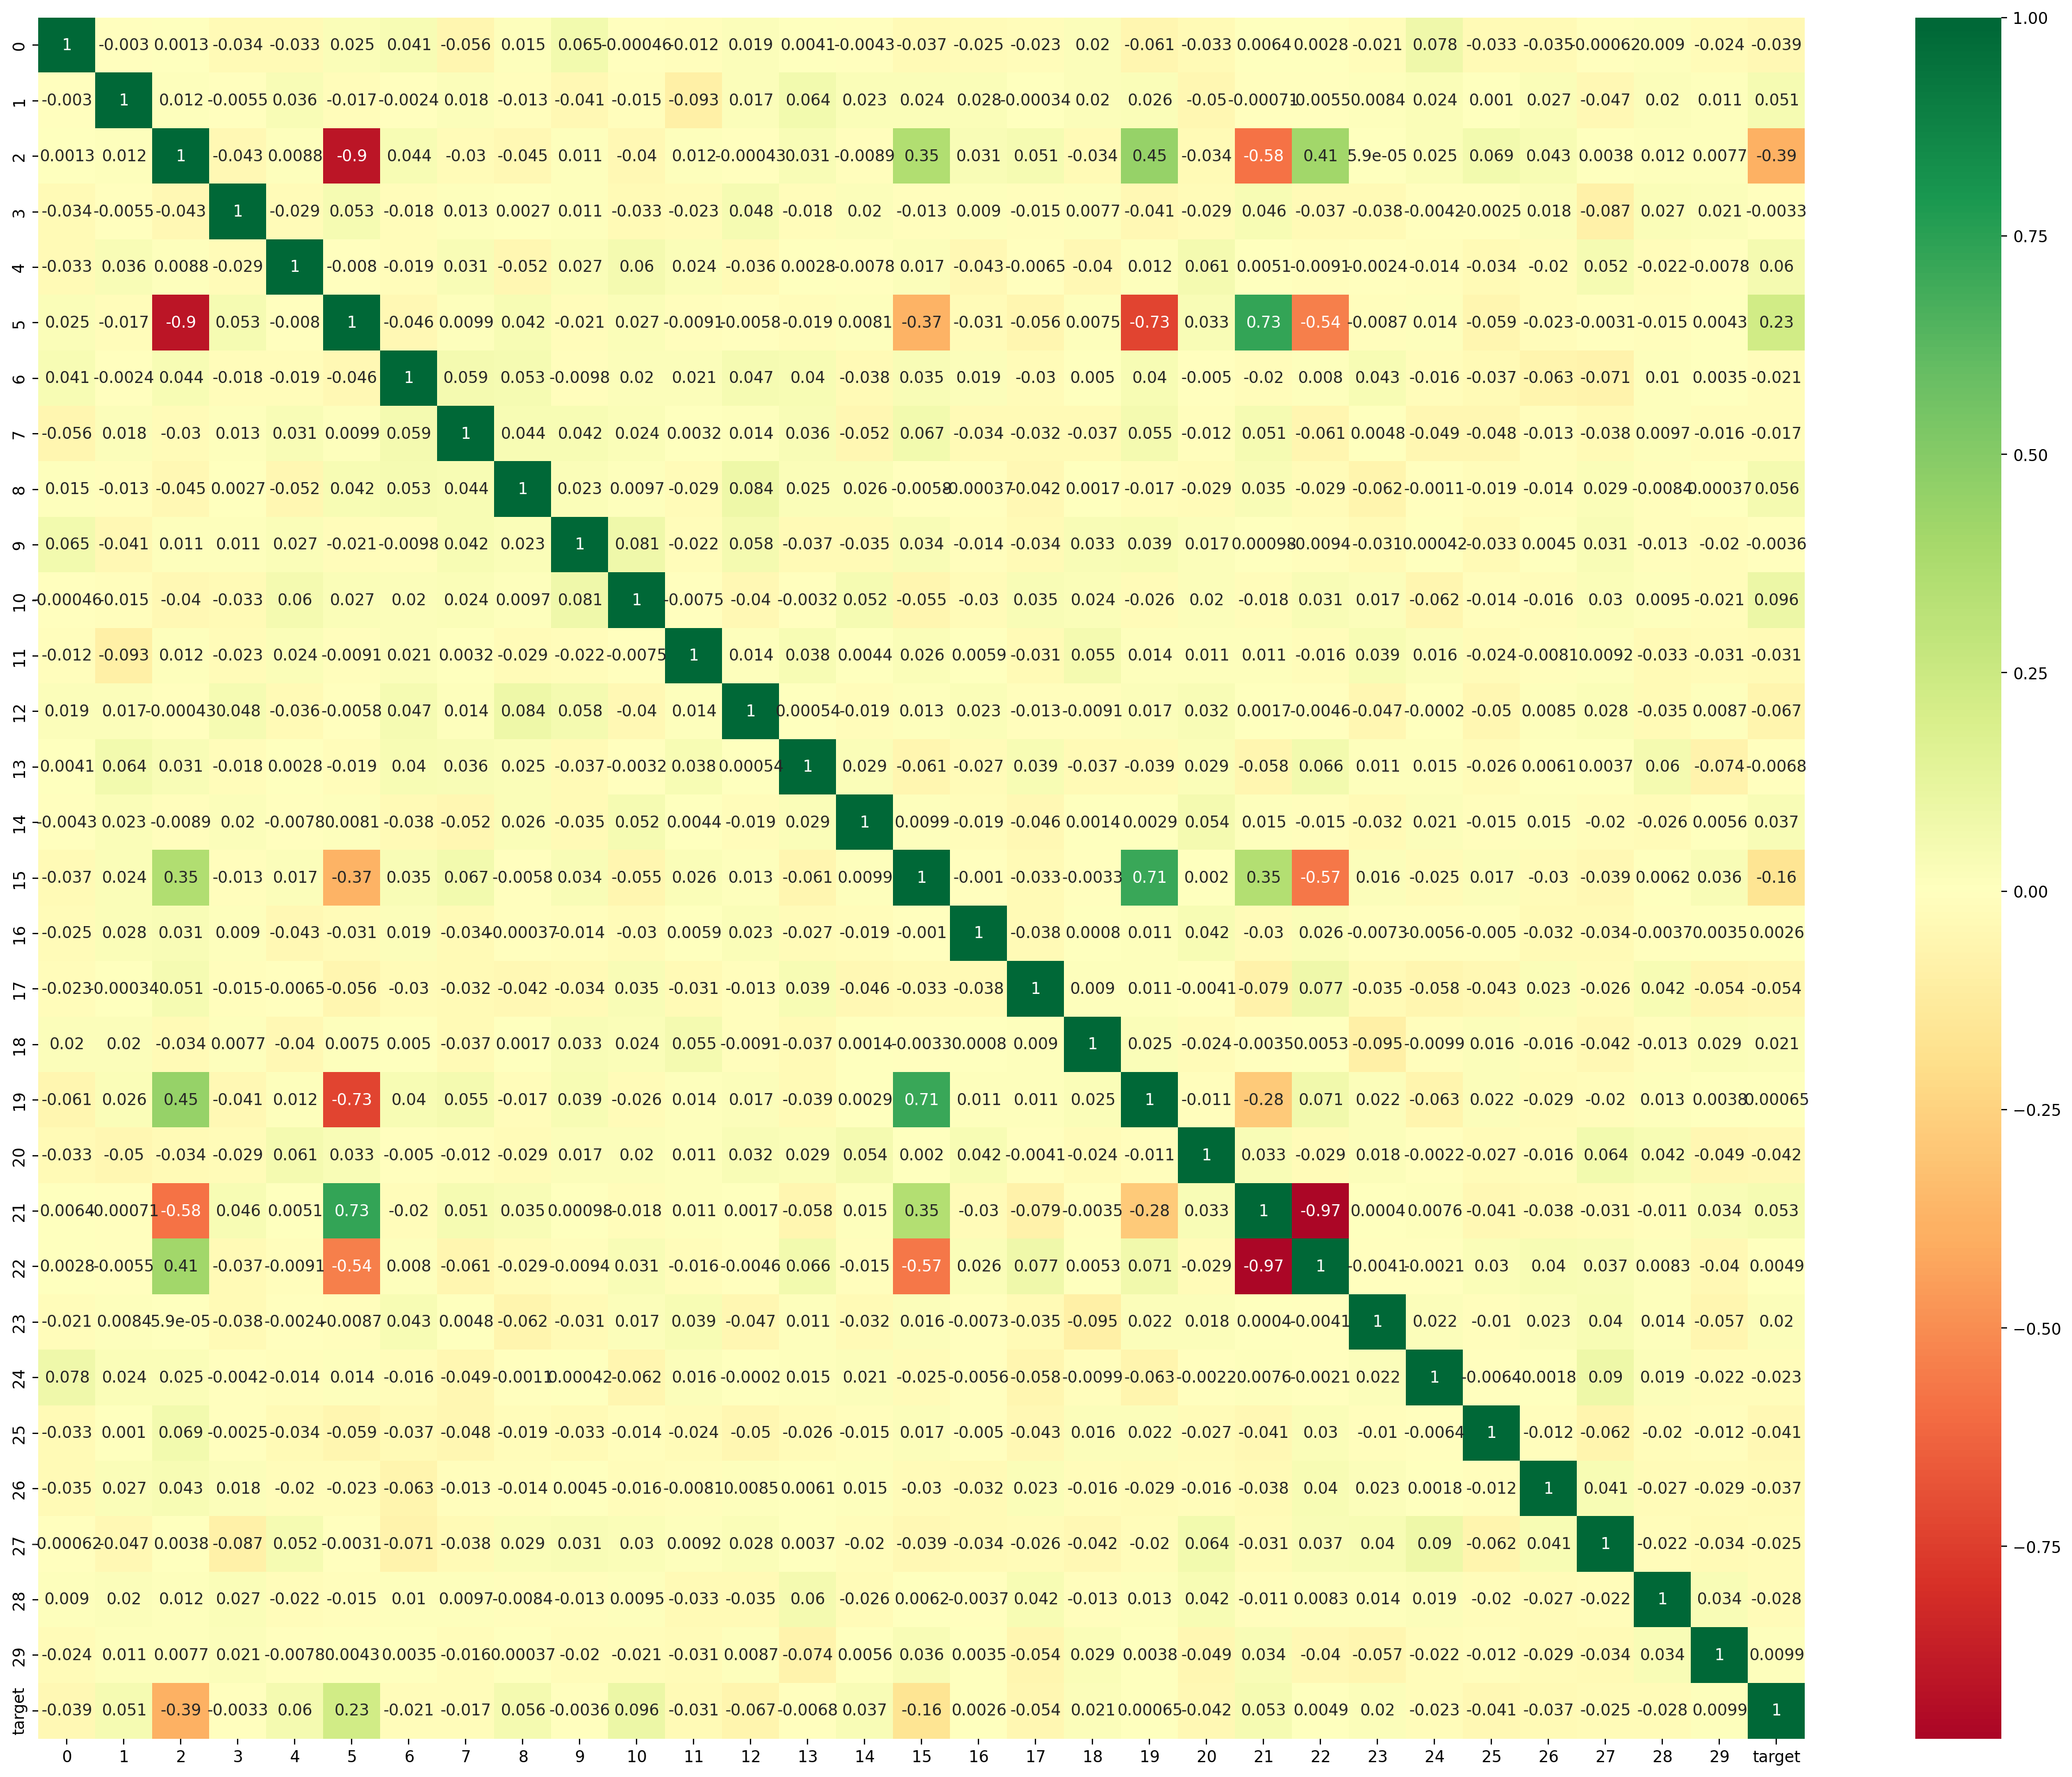

In [86]:
import seaborn as sns
corel = train.corr()
corel

plt.figure(figsize=(25,20), dpi= 200)
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [39]:
train = train.drop(['0','1','3','4','6', '7', '8','9', '10', '11','12', '13', '14','16', '17', '18','19', '20', '21','22', '23', '24','25','26', '27', '28','29'], axis = 1)
train

,Unnamed: 0,index,2,5,15,target
0,0,0,-1.526395,0.431657,0.234864,1
1,1,1,0.790067,-1.636661,0.165644,0
2,2,2,0.839842,-0.969666,-1.311474,1
3,3,3,-0.661755,0.002671,0.817381,1
4,4,4,-1.020284,0.497832,3.025733,1
...,...,...,...,...,...,...
795,795,795,-0.727074,1.029718,-0.374016,0
796,796,796,-1.185683,0.712851,0.140515,1
797,797,797,-1.008733,0.486804,-1.796093,1
798,798,798,-0.127637,-0.426872,-1.382911,1


In [58]:
train = train.drop(['5','15'], axis = 1)
train

,0,1,2,3,4,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,target
0,-0.492317,1.466367,-1.526395,-1.096350,1.535413,-0.995667,-0.923376,-0.046921,-1.552539,0.242019,...,0.297878,-0.284032,1.687770,-0.921498,1.125147,-1.374343,-1.134642,0.455824,-0.840537,1
1,-0.008567,1.139580,0.790067,-0.228271,1.113299,-2.196571,0.242685,0.598070,-0.757704,0.591841,...,-1.990695,1.846958,-0.568885,0.989542,1.480607,1.359533,-0.868660,-1.588205,-0.644534,0
2,0.262494,-1.708783,0.839842,-0.687014,-1.073257,-0.193912,-0.176669,0.659922,0.596649,1.466172,...,-2.166032,2.418959,1.634712,-0.602909,0.883138,-0.286632,-0.075973,0.234760,0.082982,1
3,-1.804729,-0.241023,-0.661755,0.818932,-0.603637,1.321453,-0.192295,-0.210527,0.534755,0.702200,...,0.424665,-0.605261,-1.361730,0.578875,0.714414,0.152165,2.286288,-0.285059,0.638533,1
4,-0.017279,0.813156,-1.020284,0.874544,-0.572061,0.012510,-0.743429,-0.439319,0.255225,1.276480,...,2.769164,-3.464306,-0.087558,-0.654737,2.019519,-2.293658,-1.574068,1.344927,-2.390142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.480216,-0.815049,-0.727074,0.511742,-0.507355,0.429738,0.146823,0.291985,-1.609678,-0.497408,...,0.961482,-0.795995,0.063269,-0.618536,0.586455,-0.047379,0.299899,0.725734,-0.649755,0
796,0.857515,2.327731,-1.185683,-0.586519,-0.558847,0.261446,-1.064356,0.777612,0.679031,0.745507,...,0.749485,-0.710907,-0.537000,0.894755,-0.981916,-0.062048,0.609614,0.206624,-1.724080,1
797,0.023109,0.342980,-1.008733,-0.841854,-0.168426,-1.697874,-0.780809,1.249663,-2.226879,0.577813,...,-1.049205,1.553320,-1.185487,-0.677708,0.329874,0.889464,-0.528109,0.443686,0.380687,1
798,0.081947,-0.562397,-0.127637,-0.105462,0.535161,2.288164,-0.962513,-0.925017,-0.505982,-0.181623,...,-1.758119,2.087053,1.204362,-1.382999,-0.329993,0.443899,2.517259,0.799944,-0.439192,1


In [ ]:

corel = train.corr()
corel

plt.figure(figsize=(30,20), dpi= 150)
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [76]:
%%time
from sklearn.model_selection import train_test_split

# Выделим вектор признаков Х и вектор ответов y
X = train.drop(['target'], axis=1)
y = train['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LogisticRegression()
# model = KMeans()
# model = LinearRegression()

# модель учится, для этого ей нужны правильные
model.fit(X_train, y_train)

answers_pred = model.predict(X_test)

CPU times: user 19.7 ms, sys: 6.99 ms, total: 26.7 ms
Wall time: 19.2 ms


In [77]:

from sklearn.metrics import accuracy_score

# Как оценить насколько хорошо работает ваша модель?

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(accuracy_score(y_test,answers_pred))

0.725


In [ ]:
a=model.coef_


a


array([[-0.07314609,  0.13401381, -1.08343777, -0.00262401,  0.19263984,
         0.24828883, -0.04411657, -0.09394366,  0.18277679, -0.04485763,
         0.16570812, -0.03540178, -0.19796533,  0.01876674,  0.07386593,
        -0.18467696,  0.09620788, -0.09789936, -0.05005091,  0.73760047,
        -0.1421943 , -0.15076143,  0.24537399,  0.08343607,  0.08909107,
        -0.01043203, -0.02122577, -0.07481516, -0.06689295,  0.05886479]])

In [ ]:
sv=model.intercept_[0]
print(sv)

-0.6621236724056665


In [ ]:
print(sv,end=' ')
for i in range(0,30):
  print("+", a[0][i],"*",i,end=' ')

-0.6621236724056665 + -0.07314608739353973 * 0 + 0.1340138103838756 * 1 + -1.0834377746869346 * 2 + -0.0026240078685082604 * 3 + 0.19263983762379105 * 4 + 0.24828882762180982 * 5 + -0.04411657048993899 * 6 + -0.09394365624576026 * 7 + 0.1827767910725777 * 8 + -0.04485762991494456 * 9 + 0.16570812256049436 * 10 + -0.035401781490906926 * 11 + -0.19796532870933714 * 12 + 0.018766744618576636 * 13 + 0.0738659338313181 * 14 + -0.18467696330049432 * 15 + 0.0962078771893732 * 16 + -0.09789935607949242 * 17 + -0.05005091058467712 * 18 + 0.7376004656843155 * 19 + -0.14219430448587525 * 20 + -0.15076143120837698 * 21 + 0.24537398617941805 * 22 + 0.08343607307182717 * 23 + 0.08909106525273017 * 24 + -0.01043202979672812 * 25 + -0.02122577088214252 * 26 + -0.07481515965594726 * 27 + -0.06689294927443544 * 28 + 0.05886478506122495 * 29 

In [ ]:
test

,Unnamed: 0,index,0,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
0,0,800,1.432238,1.257644,1.890934,-0.076106,-0.203592,-1.030505,-0.507463,-0.913854,...,-1.520607,-0.456102,0.215358,-1.112354,0.253735,-1.096198,0.729349,-0.271966,-1.197476,-0.366255
1,1,801,-0.487362,-0.529995,-2.155134,-0.304178,0.592418,2.116620,-1.257519,-0.068750,...,-1.217697,3.722498,-3.980885,-0.650480,1.587658,-1.218420,-0.091350,1.049596,-0.329357,-1.257669
2,2,802,0.962898,-0.504579,-2.691505,0.360136,-0.140119,1.901269,-1.848652,0.011345,...,-1.038533,0.656443,-0.096040,0.475109,0.808705,-0.809677,0.088951,-1.145836,-0.370616,-0.481098
3,3,803,-1.065925,0.873071,-1.037717,0.662265,0.802348,0.726761,0.453310,-1.594920,...,-0.033588,-0.430315,0.858692,0.399967,-0.095303,-1.550865,-0.241926,0.676382,1.070216,0.645921
4,4,804,0.728761,-1.386261,-2.024987,-0.384726,-0.513772,1.314300,-0.220896,-1.090314,...,-1.170150,-0.058732,0.595794,-0.524804,-0.372592,-1.115247,0.472592,-0.472584,-1.116276,0.095643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,995,0.846628,-0.749934,-1.338411,0.220909,0.416199,1.276989,-1.002624,1.014313,...,-1.269906,0.084734,0.438042,0.558635,0.376235,-0.420479,1.077255,0.308251,-0.004729,-0.228137
196,196,996,-1.360590,-0.435774,-0.959673,1.448202,1.623034,1.250623,-0.590804,-0.366393,...,-1.316549,1.347188,-1.208343,-0.264682,1.953662,0.097516,1.251864,1.437369,1.422854,-0.830343
197,197,997,0.165061,0.136864,1.754852,-1.034737,0.656459,-2.282070,0.293433,-0.115058,...,0.758951,-2.311418,2.012022,0.193781,-0.573808,-0.233587,0.232461,-1.188404,-1.117578,0.475218
198,198,998,0.063662,-0.131181,-3.447062,0.437513,-0.749994,3.151641,-1.548259,0.354168,...,0.323803,2.119067,-1.441525,1.142955,2.426559,2.700225,0.238825,-0.512474,-1.756672,-1.366628


In [ ]:
print(test.isna().sum())

Unnamed: 0    0
index         0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
dtype: int64


In [ ]:
test = test.drop(['index'], axis=1)

print(test.isna().sum())
test

Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
dtype: int64


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,1.432238,1.257644,1.890934,-0.076106,-0.203592,-1.030505,-0.507463,-0.913854,-1.335551,...,-1.520607,-0.456102,0.215358,-1.112354,0.253735,-1.096198,0.729349,-0.271966,-1.197476,-0.366255
1,1,-0.487362,-0.529995,-2.155134,-0.304178,0.592418,2.116620,-1.257519,-0.068750,-1.477922,...,-1.217697,3.722498,-3.980885,-0.650480,1.587658,-1.218420,-0.091350,1.049596,-0.329357,-1.257669
2,2,0.962898,-0.504579,-2.691505,0.360136,-0.140119,1.901269,-1.848652,0.011345,0.416069,...,-1.038533,0.656443,-0.096040,0.475109,0.808705,-0.809677,0.088951,-1.145836,-0.370616,-0.481098
3,3,-1.065925,0.873071,-1.037717,0.662265,0.802348,0.726761,0.453310,-1.594920,-0.122923,...,-0.033588,-0.430315,0.858692,0.399967,-0.095303,-1.550865,-0.241926,0.676382,1.070216,0.645921
4,4,0.728761,-1.386261,-2.024987,-0.384726,-0.513772,1.314300,-0.220896,-1.090314,-1.302709,...,-1.170150,-0.058732,0.595794,-0.524804,-0.372592,-1.115247,0.472592,-0.472584,-1.116276,0.095643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.846628,-0.749934,-1.338411,0.220909,0.416199,1.276989,-1.002624,1.014313,1.457863,...,-1.269906,0.084734,0.438042,0.558635,0.376235,-0.420479,1.077255,0.308251,-0.004729,-0.228137
196,196,-1.360590,-0.435774,-0.959673,1.448202,1.623034,1.250623,-0.590804,-0.366393,1.995228,...,-1.316549,1.347188,-1.208343,-0.264682,1.953662,0.097516,1.251864,1.437369,1.422854,-0.830343
197,197,0.165061,0.136864,1.754852,-1.034737,0.656459,-2.282070,0.293433,-0.115058,0.586726,...,0.758951,-2.311418,2.012022,0.193781,-0.573808,-0.233587,0.232461,-1.188404,-1.117578,0.475218
198,198,0.063662,-0.131181,-3.447062,0.437513,-0.749994,3.151641,-1.548259,0.354168,0.694744,...,0.323803,2.119067,-1.441525,1.142955,2.426559,2.700225,0.238825,-0.512474,-1.756672,-1.366628


In [ ]:
predictions = model.predict(test.drop(columns=['Unnamed: 0']))
predictions

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0])

In [ ]:

from google.colab import files
final_prediction = pd.DataFrame({'index':test['Unnamed: 0'],'target':predictions})

final_prediction.shape

final_prediction.to_csv('final_predictionpLOGREG.csv', index=False)
files.download("final_predictionpLOGREG.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[26,  7],
       [15, 32]])

In [79]:

df_y = pd.DataFrame(y_test)
df_y.value_counts()

target
1         47
0         33
dtype: int64

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 26
FP: 7
FN: 15
TP: 32


In [81]:
#accuracy
accuracy=((tp+tn)/(tn+fp+fn+tp))
print(accuracy_score(y_test, answers_pred))
accuracy


0.725


0.725

In [85]:
#Recall
Recall=(tp/(tp+fn))
print(recall_score(y_test, answers_pred))
Recall

0.6808510638297872


0.6808510638297872

In [83]:
#Precision
Precision=(tp/(tp+fp))
print(precision_score(y_test, answers_pred))
Precision

0.8205128205128205


0.8205128205128205

In [84]:
#f1
f1=(2*Precision*Recall)/(Recall+Precision)
print(f1_score(y_test, answers_pred))
f1

0.7441860465116279


0.7441860465116279

In [ ]:
#Метрики получились неплохими, тк они ближе к 1 чем к 0.

In [ ]:
final_prediction


,index,target
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
195,195,1
196,196,1
197,197,0
198,198,1
